# Analisis Data BMKG Palembang
Tn: Temperatur minimum (°C)

Tx: Temperatur maksimum (°C)

Tavg: Temperatur rata - rata (°C)

RH_avg: Kelembapan rata - rata (%)

RR: Curah hujan (mm)

ss: Lamanya penyinaran matahari (Jam)

ff_x: Kecepatan angin maksimum (m/s)

ddd_x: Arah angin saat kecepatan maksimum (°)

ff_avg: Kecepatan angin rata - rata (m/s)

ddd_car: Arah angin terbanyak (°)


# Pengecekan dan Pembersihan Data




In [ ]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium

data = pd.read_excel("825220029_Palembang_2000_2009.xlsx", sheet_name = "Sheet1")

In [ ]:
#Cetak data 5 atas
data.head()

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,2000-01-01,23.0,30.0,26.1,86,21.0,0.1,8.0,270.0,2,NW
1,2000-01-02,22.0,29.2,26.1,90,7.2,0.0,8.0,315.0,2,NW
2,2000-01-03,23.0,30.2,25.8,88,0.4,3.0,5.0,360.0,2,NW
3,2000-01-04,23.0,29.7,24.4,97,28.3,1.6,6.0,360.0,0,N
4,2000-01-05,23.0,31.5,26.7,83,40.2,6.0,5.0,270.0,1,W


In [ ]:
#Mengubah 8888 dan 9999 dengan NaN, karena 8888 dan 9999 mempunyai arti data yang hilang
#NaN itu adalah Not a Number, digunakan untuk mewakili nilai yang hilang atau tidak dapat dihitung dalam data
data.replace({8888: np.nan, 9999: np.nan}, inplace=True)

In [ ]:
#Menampilkan deskripsi statistika (nilai rata - rata, standar deviasi, nilai minimum, nilai maksimum, dan kuartil)
desc = data.describe()
desc #panggil

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
count,3653,3651.000000,3653.000000,3653.000000,3653.000000,3324.000000,3645.000000,3652.000000,3647.000000,3653.000000
mean,2004-12-30 23:59:59.999999872,22.928513,32.215439,26.959075,82.696140,7.759085,4.421262,7.406627,196.292295,1.576786
min,2000-01-01 00:00:00,19.000000,25.100000,23.900000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2002-07-02 00:00:00,22.000000,31.400000,26.300000,79.000000,0.000000,2.500000,6.000000,90.000000,1.000000
50%,2004-12-31 00:00:00,23.000000,32.400000,27.000000,83.000000,0.300000,4.700000,7.000000,135.000000,2.000000
75%,2007-07-02 00:00:00,24.000000,33.200000,27.600000,86.000000,8.100000,6.500000,9.000000,315.000000,2.000000
max,2009-12-31 00:00:00,29.000000,36.200000,29.900000,98.000000,172.200000,8.000000,23.000000,360.000000,5.000000
std,NaN,1.058086,1.502161,0.939118,5.654015,16.316308,2.374716,2.474806,112.981327,0.934860


In [ ]:
#Pembersihan data
#Menghilangkan ddd_car, karena variabel tersebut tidak mendukung dalam penelitian analisis visual time series plot
data2 = data.drop(['ddd_car'], axis = 1)
data2.head()

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
0,2000-01-01,23.0,30.0,26.1,86,21.0,0.1,8.0,270.0,2
1,2000-01-02,22.0,29.2,26.1,90,7.2,0.0,8.0,315.0,2
2,2000-01-03,23.0,30.2,25.8,88,0.4,3.0,5.0,360.0,2
3,2000-01-04,23.0,29.7,24.4,97,28.3,1.6,6.0,360.0,0
4,2000-01-05,23.0,31.5,26.7,83,40.2,6.0,5.0,270.0,1


In [ ]:
#Pembersihan data
#Menambahkan kolom Tahun
data2['Tahun'] = pd.DatetimeIndex(data['Date']).year

In [ ]:
#Pembersihan data
#Menambahkan kolom Tahun dari kolom date
data2.rename(index=str, columns={"Tn":"Temperatur Minimum",
                                 "Tx":"Temperatur Maksimum",
                                 "Tavg": "Temperatur Rata - Rata",
                                 "RH_avg": "Kelembapan",
                                 "RR": "Curah Hujan",
                                 "ss": "Durasi Penyinaran Matahari",
                                 "ff_x": "Kecepatan Angin Maksimum",
                                 "ddd_x": "Arah Angin Saat Kecepatan Maksimum",
                                 "ff_avg": "Kecepatan Angin Rata - Rata"}, inplace=True)

In [ ]:
#Menghitung jumlah nilai yang hilang (missing values)
data2.isna().sum()

Date                                    0
Temperatur Minimum                      2
Temperatur Maksimum                     0
Temperatur Rata - Rata                  0
Kelembapan                              0
Curah Hujan                           329
Durasi Penyinaran Matahari              8
Kecepatan Angin Maksimum                1
Arah Angin Saat Kecepatan Maksimum      6
Kecepatan Angin Rata - Rata             0
Tahun                                   0
dtype: int64

In [ ]:
#Menghitung persentase nilai yang hilang (missing values)
missing_percentage = data2.isna().sum()/len(data2)*100

missing_percentage #panggil

Date                                  0.000000
Temperatur Minimum                    0.054750
Temperatur Maksimum                   0.000000
Temperatur Rata - Rata                0.000000
Kelembapan                            0.000000
Curah Hujan                           9.006296
Durasi Penyinaran Matahari            0.218998
Kecepatan Angin Maksimum              0.027375
Arah Angin Saat Kecepatan Maksimum    0.164249
Kecepatan Angin Rata - Rata           0.000000
Tahun                                 0.000000
dtype: float64

In [ ]:
#Mengisi missing values
data2 = data2.ffill()
data2 = data2.bfill()

In [ ]:
#Menghitung jumlah nilai yang hilang (missing values)
data2.isna().sum()

Date                                  0
Temperatur Minimum                    0
Temperatur Maksimum                   0
Temperatur Rata - Rata                0
Kelembapan                            0
Curah Hujan                           0
Durasi Penyinaran Matahari            0
Kecepatan Angin Maksimum              0
Arah Angin Saat Kecepatan Maksimum    0
Kecepatan Angin Rata - Rata           0
Tahun                                 0
dtype: int64

In [ ]:
#Menghitung persentase nilai yang hilang (missing values)
missing_percentage = data2.isna().sum()/len(data2)*100

missing_percentage #panggil

Date                                  0.0
Temperatur Minimum                    0.0
Temperatur Maksimum                   0.0
Temperatur Rata - Rata                0.0
Kelembapan                            0.0
Curah Hujan                           0.0
Durasi Penyinaran Matahari            0.0
Kecepatan Angin Maksimum              0.0
Arah Angin Saat Kecepatan Maksimum    0.0
Kecepatan Angin Rata - Rata           0.0
Tahun                                 0.0
dtype: float64

In [ ]:
#Mengcek duplikasi data
duplicatesNum= data2.duplicated().sum()
print("%d duplikasi data"% (duplicatesNum))

0 duplikasi data


In [ ]:
#Memanggil data
data2.head()

,Date,Temperatur Minimum,Temperatur Maksimum,Temperatur Rata - Rata,Kelembapan,Curah Hujan,Durasi Penyinaran Matahari,Kecepatan Angin Maksimum,Arah Angin Saat Kecepatan Maksimum,Kecepatan Angin Rata - Rata,Tahun
0,2000-01-01,23.0,30.0,26.1,86,21.0,0.1,8.0,270.0,2,2000
1,2000-01-02,22.0,29.2,26.1,90,7.2,0.0,8.0,315.0,2,2000
2,2000-01-03,23.0,30.2,25.8,88,0.4,3.0,5.0,360.0,2,2000
3,2000-01-04,23.0,29.7,24.4,97,28.3,1.6,6.0,360.0,0,2000
4,2000-01-05,23.0,31.5,26.7,83,40.2,6.0,5.0,270.0,1,2000


# Analisis Data Tren Temperatur Minimum


In [ ]:
#Memanggil data
data2.head()

,Date,Temperatur Minimum,Temperatur Maksimum,Temperatur Rata - Rata,Kelembapan,Curah Hujan,Durasi Penyinaran Matahari,Kecepatan Angin Maksimum,Arah Angin Saat Kecepatan Maksimum,Kecepatan Angin Rata - Rata,Tahun
0,2000-01-01,23.0,30.0,26.1,86,21.0,0.1,8.0,270.0,2,2000
1,2000-01-02,22.0,29.2,26.1,90,7.2,0.0,8.0,315.0,2,2000
2,2000-01-03,23.0,30.2,25.8,88,0.4,3.0,5.0,360.0,2,2000
3,2000-01-04,23.0,29.7,24.4,97,28.3,1.6,6.0,360.0,0,2000
4,2000-01-05,23.0,31.5,26.7,83,40.2,6.0,5.0,270.0,1,2000


In [ ]:
#Rata - Rata Temperatur Minimum
data2.groupby('Tahun')['Temperatur Minimum'].mean()

Tahun
2000    23.144809
2001    22.980822
2002    22.816438
2003    22.657534
2004    22.428962
2005    22.295890
2006    22.120548
2007    23.673973
2008    23.478142
2009    23.687671
Name: Temperatur Minimum, dtype: float64

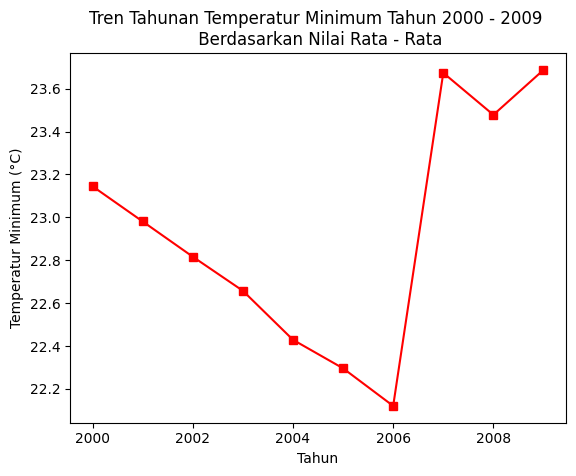

In [ ]:
#Tren temperatur minimum berdasarkan tahunan, menggunakan mean(), max(), min()
data2.groupby('Tahun')['Temperatur Minimum'].mean().plot(marker='s', color='red')
plt.title('Tren Tahunan Temperatur Minimum Tahun 2000 - 2009 \n Berdasarkan Nilai Rata - Rata')
plt.ylabel('Temperatur Minimum (°C)')
plt.xlabel('Tahun')
plt.show()


# Analisis Data Tren Temperatur Maksimum


In [ ]:
#Memanggil data
data2.head()

,Date,Temperatur Minimum,Temperatur Maksimum,Temperatur Rata - Rata,Kelembapan,Curah Hujan,Durasi Penyinaran Matahari,Kecepatan Angin Maksimum,Arah Angin Saat Kecepatan Maksimum,Kecepatan Angin Rata - Rata,Tahun
0,2000-01-01,23.0,30.0,26.1,86,21.0,0.1,8.0,270.0,2,2000
1,2000-01-02,22.0,29.2,26.1,90,7.2,0.0,8.0,315.0,2,2000
2,2000-01-03,23.0,30.2,25.8,88,0.4,3.0,5.0,360.0,2,2000
3,2000-01-04,23.0,29.7,24.4,97,28.3,1.6,6.0,360.0,0,2000
4,2000-01-05,23.0,31.5,26.7,83,40.2,6.0,5.0,270.0,1,2000


In [ ]:
#Rata - Rata Temperatur Maksimum
data2.groupby('Tahun')['Temperatur Maksimum'].mean()

Tahun
2000    31.896995
2001    32.044932
2002    32.555890
2003    32.228219
2004    32.427869
2005    32.185479
2006    32.538356
2007    32.100548
2008    31.790710
2009    32.386849
Name: Temperatur Maksimum, dtype: float64

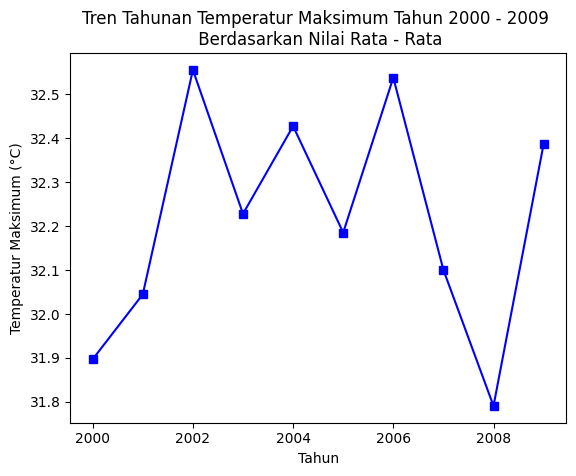

In [ ]:
#Tren temperatur maksimum berdasarkan tahunan, menggunakan mean()
data2.groupby('Tahun')['Temperatur Maksimum'].mean().plot(marker='s', color='blue')
plt.title('Tren Tahunan Temperatur Maksimum Tahun 2000 - 2009 \n Berdasarkan Nilai Rata - Rata')
plt.ylabel('Temperatur Maksimum (°C)')
plt.xlabel('Tahun')
plt.show()


# Analisis Data Tren Temperatur Rata - Rata


In [ ]:
#Memanggil data
data2.head()

,Date,Temperatur Minimum,Temperatur Maksimum,Temperatur Rata - Rata,Kelembapan,Curah Hujan,Durasi Penyinaran Matahari,Kecepatan Angin Maksimum,Arah Angin Saat Kecepatan Maksimum,Kecepatan Angin Rata - Rata,Tahun
0,2000-01-01,23.0,30.0,26.1,86,21.0,0.1,8.0,270.0,2,2000
1,2000-01-02,22.0,29.2,26.1,90,7.2,0.0,8.0,315.0,2,2000
2,2000-01-03,23.0,30.2,25.8,88,0.4,3.0,5.0,360.0,2,2000
3,2000-01-04,23.0,29.7,24.4,97,28.3,1.6,6.0,360.0,0,2000
4,2000-01-05,23.0,31.5,26.7,83,40.2,6.0,5.0,270.0,1,2000


In [ ]:
#Rata - Rata Temperatur Rata - Rata
data2.groupby('Tahun')['Temperatur Rata - Rata'].mean()

Tahun
2000    26.739344
2001    26.738356
2002    26.995068
2003    26.940548
2004    27.011475
2005    27.055068
2006    27.100548
2007    27.033699
2008    26.756011
2009    27.221644
Name: Temperatur Rata - Rata, dtype: float64

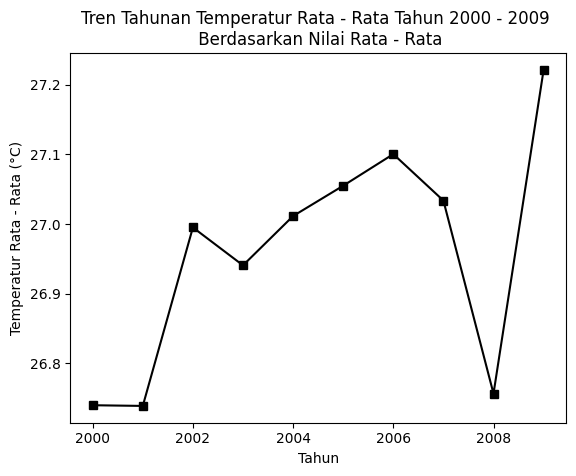

In [ ]:
#Tren temperatur rata - rata berdasarkan tahunan, menggunakan mean()
data2.groupby('Tahun')['Temperatur Rata - Rata'].mean().plot(marker='s', color='black')
plt.title('Tren Tahunan Temperatur Rata - Rata Tahun 2000 - 2009 \n Berdasarkan Nilai Rata - Rata')
plt.ylabel('Temperatur Rata - Rata (°C)')
plt.xlabel('Tahun')
plt.show()


# Analisis Data Tren Kelembapan

In [ ]:
#Memanggil data
data2.head()

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,Tahun
0,2000-01-01,23.0,30.0,26.1,86,21.0,0.1,8.0,270.0,2,2000
1,2000-01-02,22.0,29.2,26.1,90,7.2,0.0,8.0,315.0,2,2000
2,2000-01-03,23.0,30.2,25.8,88,0.4,3.0,5.0,360.0,2,2000
3,2000-01-04,23.0,29.7,24.4,97,28.3,1.6,6.0,360.0,0,2000
4,2000-01-05,23.0,31.5,26.7,83,40.2,6.0,5.0,270.0,1,2000


In [ ]:
#Rata - rata Kelembapan
data2.groupby('Tahun')['Kelembapan'].mean()

Tahun
2000    83.270492
2001    83.712329
2002    82.430137
2003    83.060274
2004    82.521858
2005    83.167123
2006    80.797260
2007    82.819178
2008    83.204918
2009    81.975342
Name: Kelembapan, dtype: float64

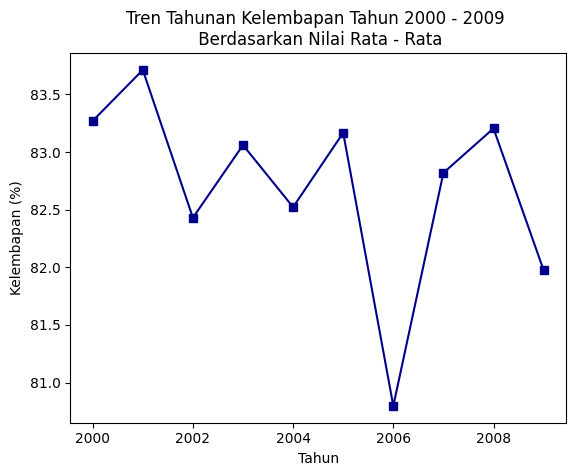

In [ ]:
#Tren kelembapan berdasarkan tahunan, menggunakan mean()
data2.groupby('Tahun')['Kelembapan'].mean().plot(marker='s', color='darkblue')
plt.title('Tren Tahunan Kelembapan Tahun 2000 - 2009 \n Berdasarkan Nilai Rata - Rata')
plt.ylabel('Kelembapan (%)')
plt.xlabel('Tahun')
plt.show()

# Analisis Data Tren Curah Hujan


In [ ]:
#Memanggil data
data2.head()

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,Tahun
0,2000-01-01,23.0,30.0,26.1,86,21.0,0.1,8.0,270.0,2,2000
1,2000-01-02,22.0,29.2,26.1,90,7.2,0.0,8.0,315.0,2,2000
2,2000-01-03,23.0,30.2,25.8,88,0.4,3.0,5.0,360.0,2,2000
3,2000-01-04,23.0,29.7,24.4,97,28.3,1.6,6.0,360.0,0,2000
4,2000-01-05,23.0,31.5,26.7,83,40.2,6.0,5.0,270.0,1,2000


In [ ]:
#Rata - rata Curah Hujan
data2.groupby('Tahun')['Curah Hujan'].mean()

Tahun
2000     8.457104
2001    10.288767
2002     6.996712
2003     7.466575
2004     7.511749
2005    10.101918
2006     7.395068
2007     7.526849
2008     8.096995
2009     6.448493
Name: Curah Hujan, dtype: float64

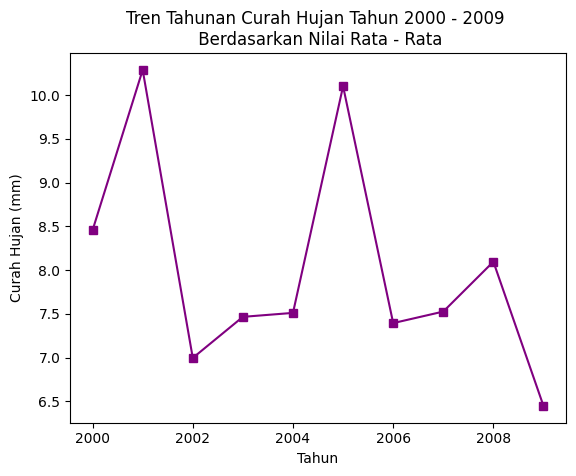

In [ ]:
#Tren curah hujan berdasarkan tahunan, menggunakan mean()
data2.groupby('Tahun')['Curah Hujan'].mean().plot(marker='s', color='purple')
plt.title('Tren Tahunan Curah Hujan Tahun 2000 - 2009 \n Berdasarkan Nilai Rata - Rata')
plt.ylabel('Curah Hujan (mm)')
plt.xlabel('Tahun')
plt.show()


# Analisis Data Tren Durasi Penyinaran Matahari

In [ ]:
#Memanggil data
data2.head()

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,Tahun
0,2000-01-01,23.0,30.0,26.1,86,21.0,0.1,8.0,270.0,2,2000
1,2000-01-02,22.0,29.2,26.1,90,7.2,0.0,8.0,315.0,2,2000
2,2000-01-03,23.0,30.2,25.8,88,0.4,3.0,5.0,360.0,2,2000
3,2000-01-04,23.0,29.7,24.4,97,28.3,1.6,6.0,360.0,0,2000
4,2000-01-05,23.0,31.5,26.7,83,40.2,6.0,5.0,270.0,1,2000


In [ ]:
#Rata - rata Durasi Penyinaran Matahari
data2.groupby('Tahun')['Durasi Penyinaran Matahari'].mean()

Tahun
2000    4.528962
2001    4.183014
2002    4.615616
2003    4.402740
2004    4.487978
2005    4.462192
2006    4.437534
2007    4.274795
2008    4.221311
2009    4.623014
Name: Durasi Penyinaran Matahari, dtype: float64

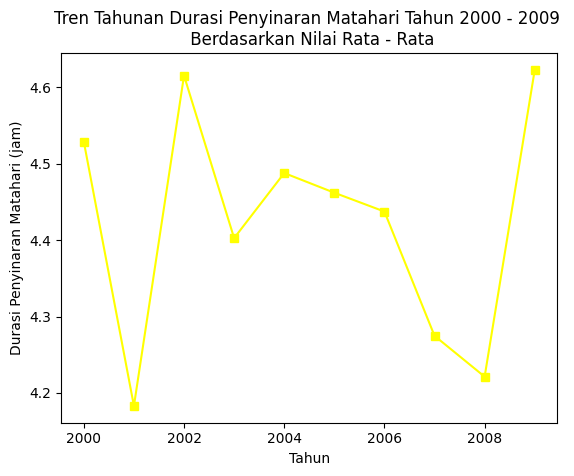

In [ ]:
#Tren Durasi Penyinaran Matahari berdasarkan tahunan, menggunakan mean()
data2.groupby('Tahun')['Durasi Penyinaran Matahari'].mean().plot(marker='s', color='yellow')
plt.title('Tren Tahunan Durasi Penyinaran Matahari Tahun 2000 - 2009 \n Berdasarkan Nilai Rata - Rata')
plt.ylabel('Durasi Penyinaran Matahari (jam)')
plt.xlabel('Tahun')
plt.show()

# Analisis Data Tren Kecepatan Angin Maksimum

In [ ]:
#Memanggil data
data2.head()

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,Tahun
0,2000-01-01,23.0,30.0,26.1,86,21.0,0.1,8.0,270.0,2,2000
1,2000-01-02,22.0,29.2,26.1,90,7.2,0.0,8.0,315.0,2,2000
2,2000-01-03,23.0,30.2,25.8,88,0.4,3.0,5.0,360.0,2,2000
3,2000-01-04,23.0,29.7,24.4,97,28.3,1.6,6.0,360.0,0,2000
4,2000-01-05,23.0,31.5,26.7,83,40.2,6.0,5.0,270.0,1,2000


In [ ]:
#Rata - rata Kecepatan Angin Maksimum
data2.groupby('Tahun')['Kecepatan Angin Maksimum'].mean()

Tahun
2000    6.404372
2001    7.263014
2002    7.663014
2003    7.731507
2004    7.803279
2005    7.583562
2006    7.679452
2007    7.265753
2008    7.461749
2009    7.213699
Name: Kecepatan Angin Maksimum, dtype: float64

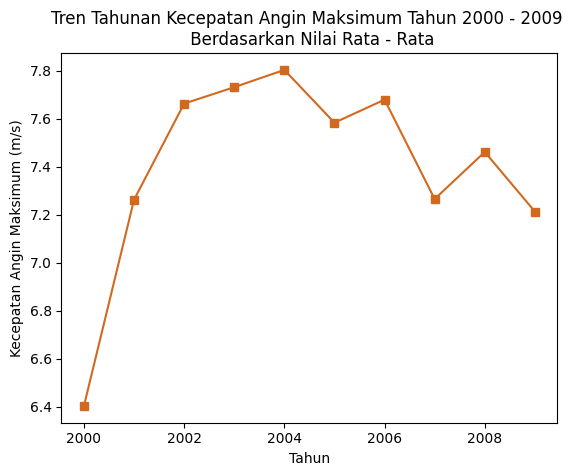

In [ ]:
#Tren Kecepatan Angin Maksimum berdasarkan tahunan, menggunakan mean()
data2.groupby('Tahun')['Kecepatan Angin Maksimum'].mean().plot(marker='s', color='chocolate')
plt.title('Tren Tahunan Kecepatan Angin Maksimum Tahun 2000 - 2009 \n Berdasarkan Nilai Rata - Rata')
plt.ylabel('Kecepatan Angin Maksimum (m/s)')
plt.xlabel('Tahun')
plt.show()

# Analisis Data Tren Arah Angin Saat Kecepatan Angin Maksimum

In [ ]:
#Memanggil data
data2.head()

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,Tahun
0,2000-01-01,23.0,30.0,26.1,86,21.0,0.1,8.0,270.0,2,2000
1,2000-01-02,22.0,29.2,26.1,90,7.2,0.0,8.0,315.0,2,2000
2,2000-01-03,23.0,30.2,25.8,88,0.4,3.0,5.0,360.0,2,2000
3,2000-01-04,23.0,29.7,24.4,97,28.3,1.6,6.0,360.0,0,2000
4,2000-01-05,23.0,31.5,26.7,83,40.2,6.0,5.0,270.0,1,2000


In [ ]:
#Rata - rata Arah Angin Saat Kecepatan Maksimum
data2.groupby('Tahun')['Arah Angin Saat Kecepatan Maksimum'].mean()

Tahun
2000    207.049180
2001    206.630137
2002    189.616438
2003    194.054795
2004    193.032787
2005    200.095890
2006    189.493151
2007    196.397260
2008    195.860656
2009    191.761644
Name: Arah Angin Saat Kecepatan Maksimum, dtype: float64

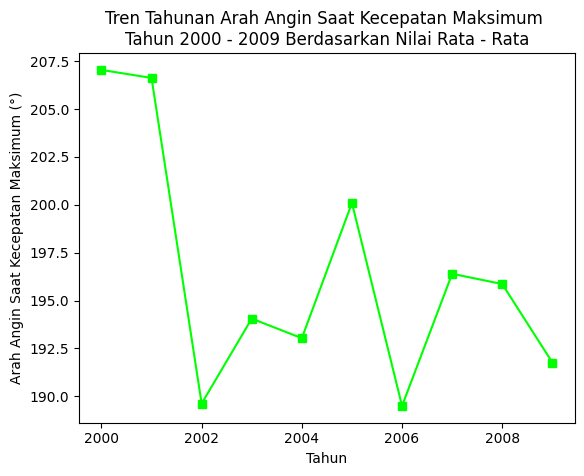

In [ ]:
#Tren Arah Angin Saat Kecepatan Maksimum berdasarkan tahunan, menggunakan mean()
data2.groupby('Tahun')['Arah Angin Saat Kecepatan Maksimum'].mean().plot(marker='s', color='lime')
plt.title('Tren Tahunan Arah Angin Saat Kecepatan Maksimum \nTahun 2000 - 2009 Berdasarkan Nilai Rata - Rata')
plt.ylabel('Arah Angin Saat Kecepatan Maksimum (°)')
plt.xlabel('Tahun')
plt.show()

# Analisis Data Kecepatan Angin Rata - Rata

In [ ]:
#Memanggil data
data2.head()

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,Tahun
0,2000-01-01,23.0,30.0,26.1,86,21.0,0.1,8.0,270.0,2,2000
1,2000-01-02,22.0,29.2,26.1,90,7.2,0.0,8.0,315.0,2,2000
2,2000-01-03,23.0,30.2,25.8,88,0.4,3.0,5.0,360.0,2,2000
3,2000-01-04,23.0,29.7,24.4,97,28.3,1.6,6.0,360.0,0,2000
4,2000-01-05,23.0,31.5,26.7,83,40.2,6.0,5.0,270.0,1,2000


In [ ]:
#Rata - rata Kecepatan Angin Rata - Rata
data2.groupby('Tahun')['Kecepatan Angin Rata - Rata'].mean()

Tahun
2000    1.644809
2001    1.830137
2002    2.065753
2003    2.115068
2004    2.065574
2005    1.473973
2006    1.542466
2007    1.186301
2008    1.046448
2009    0.797260
Name: Kecepatan Angin Rata - Rata, dtype: float64

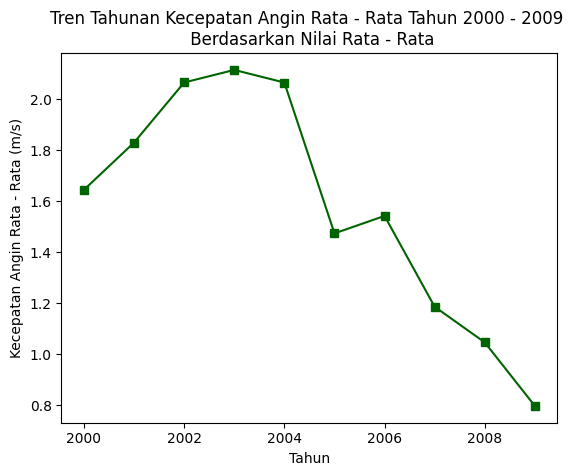

In [ ]:
#Tren kecepatan angin rata - rata berdasarkan tahunan, menggunakan mean(), max(), min()
data2.groupby('Tahun')['Kecepatan Angin Rata - Rata'].mean().plot(marker='s', color='darkgreen')
plt.title('Tren Tahunan Kecepatan Angin Rata - Rata Tahun 2000 - 2009 \n Berdasarkan Nilai Rata - Rata')
plt.ylabel('Kecepatan Angin Rata - Rata (m/s)')
plt.xlabel('Tahun')
plt.show()